# CODECHEF-VIT RECRUITMENTS 2024


# Step 0: Copy this notebook

**Guidelines**:

- Make a copy of this notebook in your Google Drive
- Submit the editted colab notebook as your final submission


## Step 1: Dataset for this task

**Guidelines**: Download the dataset from the link provided and import it into your notebook

**Link**: https://www.kaggle.com/datasets/kuralamuthan300/glassdoor-data-science-jobs/data


# Step 2: Import necessary libraries

Guidelines: Import all required libraries here


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
sns.set()

# Step 3: Import Dataset

**Guidelines**: Import the csv dataset into a dataframe


In [31]:
df = pd.read_csv('Glassdoor_Job_Postings.csv')
df.head()

,company,job_title,company_rating,job_description,location,salary_avg_estimate,salary_estimate_payperiod,company_size,company_founded,employment_type,industry,sector,revenue,career_opportunities_rating,comp_and_benefits_rating,culture_and_values_rating,senior_management_rating,work_life_balance_rating
0,ABB,Junior Data Analyst,4.0,Junior Data Analyst\nTake your next career ste...,Bengaluru,"₹3,25,236",/yr (est.),10000+ Employees,1883,Company - Public,Electronics Manufacturing,Manufacturing,$10+ billion (USD),3.7,3.6,4.0,3.5,3.9
1,Philips,Data Scientist - AI/ML,4.0,Job Title\nData Scientist - AI/ML\nJob Descrip...,Bengaluru,NaN,NaN,10000+ Employees,1891,Company - Public,Healthcare Services & Hospitals,Healthcare,$10+ billion (USD),3.8,3.7,4.0,3.5,4.0
2,HSBC,Data Science GSC’s,3.9,Job description\nGraduate/ Post-graduate degre...,Bengaluru,NaN,NaN,10000+ Employees,1865,Company - Public,Banking & Lending,Finance,$10+ billion (USD),3.6,3.6,3.8,3.4,3.7
3,Facctum Solutions,Data Analyst,NaN,Job Description\nExperience: 0 - 2 years in da...,Karnataka,NaN,NaN,1 to 50 Employees,--,Company - Private,--,--,Unknown / Non-Applicable,NaN,NaN,NaN,NaN,NaN
4,JPMorgan Chase & Co,Data and Analytics - Associate,4.0,JOB DESCRIPTION\n\nYou are a strategic thinker...,India,NaN,NaN,10000+ Employees,1799,Company - Public,Banking & Lending,Finance,$10+ billion (USD),4.0,3.9,3.9,3.6,3.7


In [32]:
df.columns

Index(['company', 'job_title', 'company_rating', 'job_description', 'location',
       'salary_avg_estimate', 'salary_estimate_payperiod', 'company_size',
       'company_founded', 'employment_type', 'industry', 'sector', 'revenue',
       'career_opportunities_rating', 'comp_and_benefits_rating',
       'culture_and_values_rating', 'senior_management_rating',
       'work_life_balance_rating'],
      dtype='object')

# Step 4: Data Cleaning

**Guidelines**: Prepare the data for analysis


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   company                      899 non-null    object 
 1   job_title                    900 non-null    object 
 2   company_rating               656 non-null    float64
 3   job_description              888 non-null    object 
 4   location                     900 non-null    object 
 5   salary_avg_estimate          636 non-null    object 
 6   salary_estimate_payperiod    636 non-null    object 
 7   company_size                 774 non-null    object 
 8   company_founded              774 non-null    object 
 9   employment_type              774 non-null    object 
 10  industry                     774 non-null    object 
 11  sector                       774 non-null    object 
 12  revenue                      774 non-null    object 
 13  career_opportunities

### Handling Duplicates


In [34]:
df.duplicated().sum()

5

In [35]:
df[df.duplicated() == 1].head()

,company,job_title,company_rating,job_description,location,salary_avg_estimate,salary_estimate_payperiod,company_size,company_founded,employment_type,industry,sector,revenue,career_opportunities_rating,comp_and_benefits_rating,culture_and_values_rating,senior_management_rating,work_life_balance_rating
481,"Medpace, Inc.",Data Coordinator - Core Laboratory,3.4,Job Summary :\nOur corporate activities are gr...,Thāne,"₹5,89,237",/yr (est.),5001 to 10000 Employees,1992,Company - Public,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,$2 to $5 billion (USD),3.3,3.0,3.2,3.0,3.2
570,"Medpace, Inc.",Data Coordinator - Core Laboratory,3.4,Job Summary :\nOur corporate activities are gr...,Thāne,"₹5,89,237",/yr (est.),5001 to 10000 Employees,1992,Company - Public,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,$2 to $5 billion (USD),3.3,3.0,3.2,3.0,3.2
600,Sandvik,Data Entry Operator,4.2,"Sandvik Mining & Rock Solutions, the leading g...",Udaipur,"₹4,15,692",/yr (est.),10000+ Employees,1862,Company - Public,Machinery Manufacturing,Manufacturing,$10+ billion (USD),3.8,3.9,4.0,3.5,3.9
780,Macgence Technologies (OPC) PVT LTD,Internship (Data Annotation),4.8,Selected intern's day-to-day responsibilities ...,Remote,"₹5,000",/mo (est.),Unknown,--,Company - Public,--,--,Unknown / Non-Applicable,5.0,5.0,5.0,5.0,5.0
782,Empower,Sr Analyst Data Science,3.9,Grow your career with a growing organization\n...,Bengaluru,"₹3,94,308",/yr (est.),10000+ Employees,1907,Company - Private,Investment & Asset Management,Finance,$2 to $5 billion (USD),3.9,3.6,3.9,3.6,4.0


In [36]:
# Dropping Duplicates
df = df.drop_duplicates()

### Converting to correct datatype


Columns like 'salary_avg_estimate' should have numeric values for easier EDA


In [37]:
df['salary_avg_estimate'] = df['salary_avg_estimate'].replace({'₹': '', ',': ''}, regex=True)
df['salary_avg_estimate'] = pd.to_numeric(df['salary_avg_estimate'], errors='raise')

### Handling Null values


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 895 entries, 0 to 899
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   company                      894 non-null    object 
 1   job_title                    895 non-null    object 
 2   company_rating               651 non-null    float64
 3   job_description              883 non-null    object 
 4   location                     895 non-null    object 
 5   salary_avg_estimate          631 non-null    float64
 6   salary_estimate_payperiod    631 non-null    object 
 7   company_size                 769 non-null    object 
 8   company_founded              769 non-null    object 
 9   employment_type              769 non-null    object 
 10  industry                     769 non-null    object 
 11  sector                       769 non-null    object 
 12  revenue                      769 non-null    object 
 13  career_opportunities_rati

In [39]:
def fillna_with_mode(df, by, column):
    return df[column].fillna(
        df.groupby(by)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
    )

In [40]:
# Filling null values of industry

df['industry'] = fillna_with_mode(df, ['job_title', 'company'], 'industry')
df['industry'] = fillna_with_mode(df, ['job_title'], 'industry')
df['industry'] = fillna_with_mode(df, ['company'], 'industry')

In [41]:
# Filling null values of sector

df['sector'] = fillna_with_mode(df, ['job_title', 'company','industry'], 'sector')
df['sector'] = fillna_with_mode(df, ['job_title','company'], 'sector')
df['sector'] = fillna_with_mode(df, ['job_title'], 'sector')
df['sector'] = fillna_with_mode(df, ['company'], 'sector')
df['sector'] = fillna_with_mode(df, ['industry'], 'sector')

In [42]:
# Rows which have both 'salary_avg_estimate' and 'salary_estimate_payperiod' as null
print(df[df['salary_avg_estimate'].isnull() & df['salary_estimate_payperiod'].isnull()].shape[0])

# Rows which have 'salary_avg_estimate' as null and 'salary_estimate_payperiod' as non-null
print(df[df['salary_avg_estimate'].isnull() & ~df['salary_estimate_payperiod'].isnull()].shape[0])


264
0


So all rows which have average salary estimate as null also has salary payperiod as null too. We will first fill 'salary_estimate_payperiod' based on job title and location


In [43]:
df['salary_estimate_payperiod'] = fillna_with_mode(df, ['job_title', 'company','location'], 'salary_estimate_payperiod')
df['salary_estimate_payperiod'] = fillna_with_mode(df, ['job_title', 'company'], 'salary_estimate_payperiod')
df['salary_estimate_payperiod'] = fillna_with_mode(df, ['job_title'], 'salary_estimate_payperiod')

In [44]:
df['salary_avg_estimate'] = df['salary_avg_estimate'].fillna(
    df.groupby(['location', 'job_title'])['salary_avg_estimate'].transform('mean')
)

In [45]:
df['salary_estimate_payperiod'].value_counts()

salary_estimate_payperiod
/yr (est.)    652
/mo (est.)     75
/hr (est.)      2
Name: count, dtype: int64

To make salary comparable for EDA, we will convert all salaries to a common pay period (Annual)


In [46]:
def convert_to_annual(salary, period):
    if period == '/yr (est.)':
        return salary
    elif period == '/mo (est.)':
        return salary * 12
    elif period == '/hr (est.)':
        return salary * 2080 # 40hr/week * 52 weeks

df['annual_salary_estimate'] = df.apply(lambda row: convert_to_annual(row['salary_avg_estimate'], row['salary_estimate_payperiod']), axis=1)

In [47]:
missing_values_per_row = df.isnull().sum(axis=1)
df[missing_values_per_row > 10].info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 61 to 893
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   company                      50 non-null     object 
 1   job_title                    50 non-null     object 
 2   company_rating               3 non-null      float64
 3   job_description              46 non-null     object 
 4   location                     50 non-null     object 
 5   salary_avg_estimate          32 non-null     float64
 6   salary_estimate_payperiod    37 non-null     object 
 7   company_size                 0 non-null      object 
 8   company_founded              0 non-null      object 
 9   employment_type              0 non-null      object 
 10  industry                     8 non-null      object 
 11  sector                       8 non-null      object 
 12  revenue                      0 non-null      object 
 13  career_opportunities_rati

# Step 5: Analysis

**Guidelines**: Perform your analysis here


In [48]:
df['employment_type'].unique()

array(['Company - Public', 'Company - Private', 'Self-employed',
       'Subsidiary or Business Segment', nan, 'Non-profit Organisation',
       'Private Practice / Firm', 'Unknown', 'Contract',
       'College / University'], dtype=object)

In [49]:
df['sector'].unique()

array(['Manufacturing', 'Healthcare', 'Finance', '--', 'Education',
       'Information Technology', 'Human Resources & Staffing',
       'Media & Communication', 'Pharmaceutical & Biotechnology',
       'Transportation & Logistics', 'Aerospace & Defence',
       'Management & Consulting', 'Telecommunications', 'Agriculture',
       'Real Estate', nan, 'Arts, Entertainment & Recreation',
       'Retail & Wholesale',
       'Construction, Repair & Maintenance Services', 'Insurance',
       'Energy, Mining, Utilities', 'Non-profit & NGO', 'Legal',
       'Hotel & Travel Accommodation'], dtype=object)

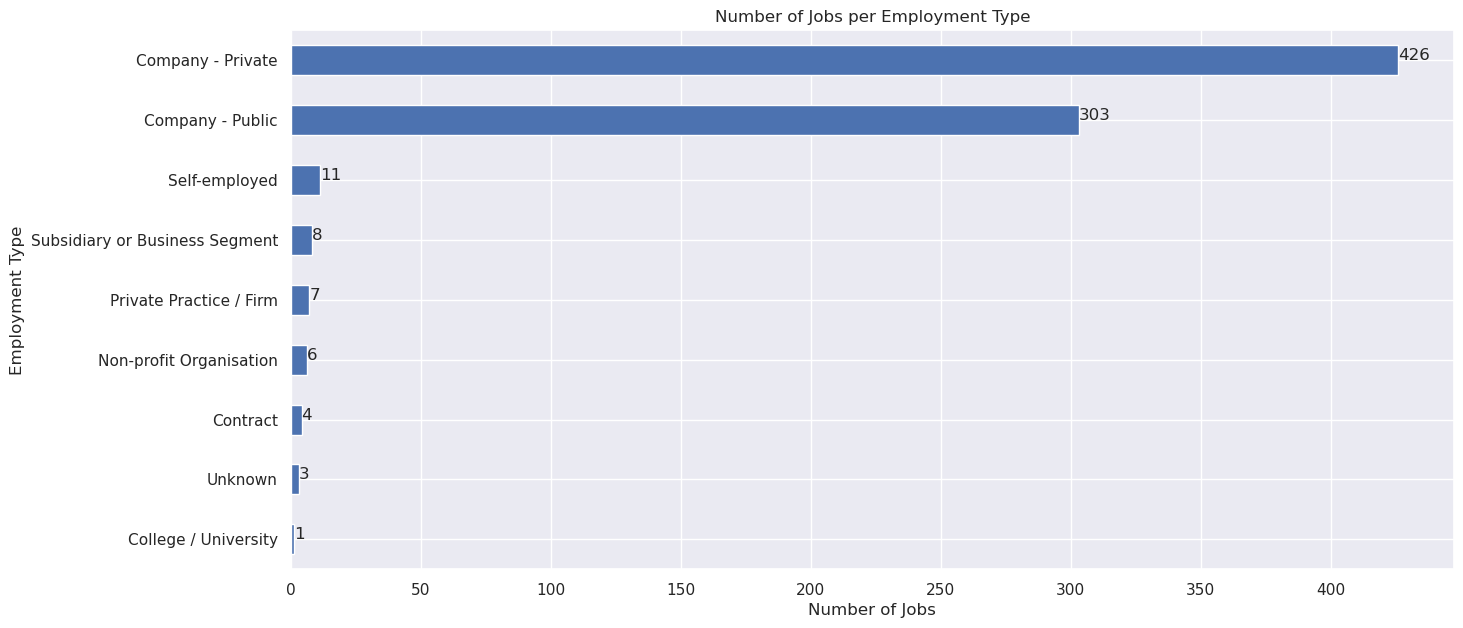

In [50]:
job_count = df['employment_type'].value_counts()

job_count.sort_values().plot(kind='barh', figsize=(15,7))
plt.title('Number of Jobs per Employment Type')
plt.ylabel('Employment Type', fontsize=12)
plt.xlabel('Number of Jobs', fontsize=12)

for index, value in enumerate(job_count.sort_values()):
    plt.text(value, index, str(value))

plt.show()

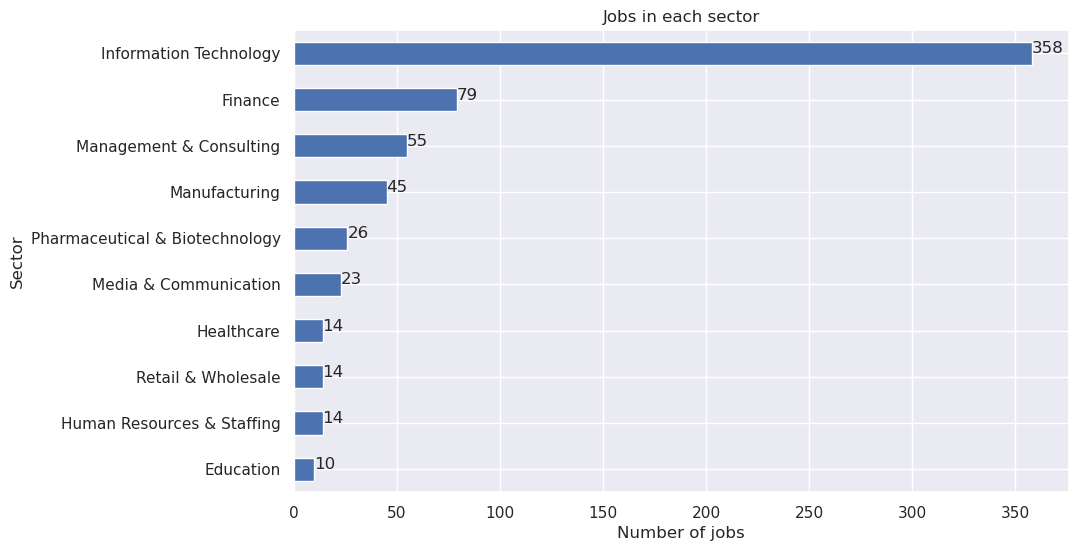

In [51]:
plt.figure(figsize=(10,6))
job_sector_count = df[df['sector']!='--']['sector'].value_counts().head(10)
job_sector_count.sort_values().plot(kind='barh')
plt.title('Jobs in each sector')
plt.xlabel('Number of jobs', fontsize=12)
plt.ylabel('Sector', fontsize=12)

for index, value in enumerate(job_sector_count.sort_values()):
    plt.text(value, index, str(value),)

plt.show()

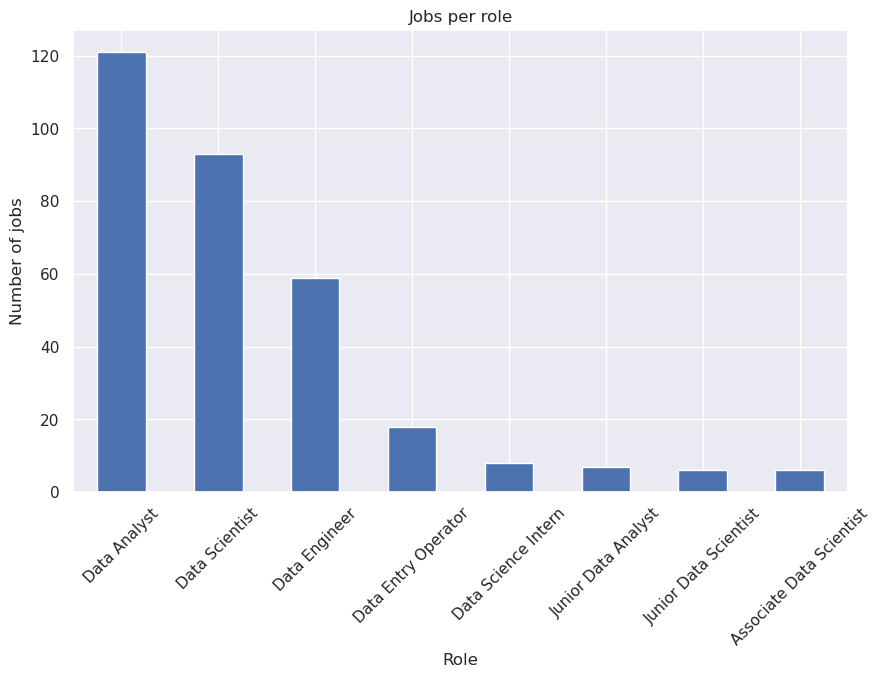

In [52]:
plt.figure(figsize=(10,6))
job_title_counts = df['job_title'].value_counts().head(8)
job_title_counts.plot(kind='bar')
plt.title('Jobs per role')
plt.ylabel('Number of jobs', fontsize=12)
plt.xlabel('Role', fontsize=12)
plt.xticks(rotation=45)
plt.show()

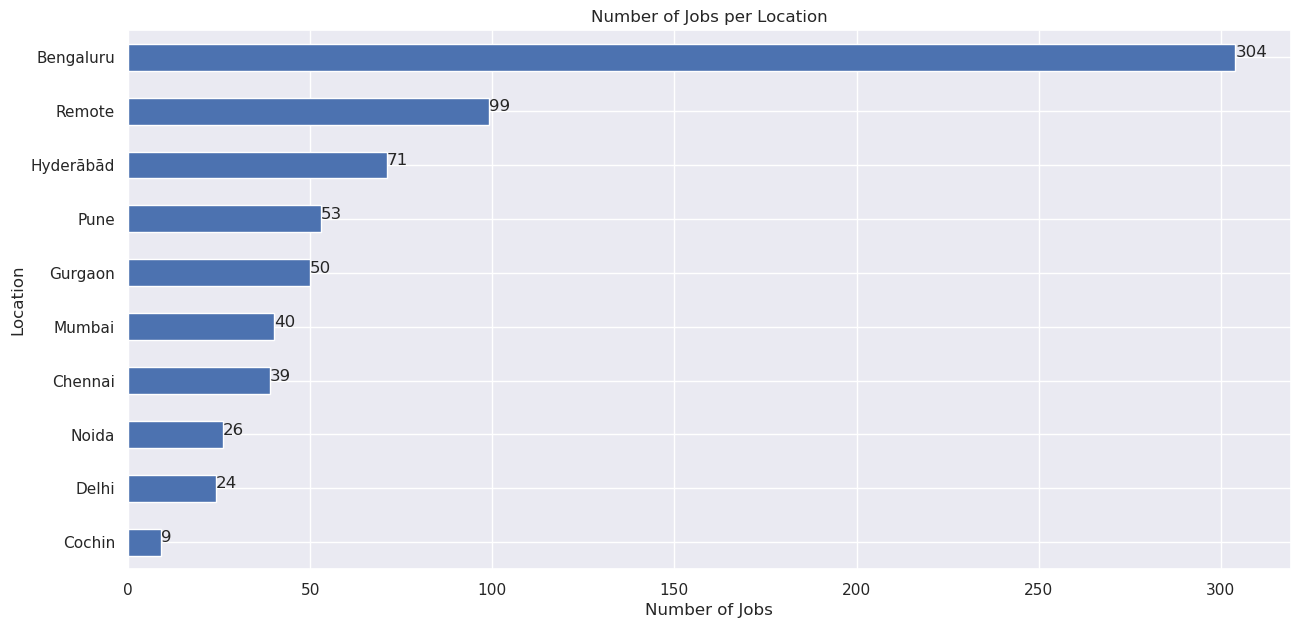

In [53]:
job_count = df[df['location']!='India']['location'].value_counts().head(10)
job_count.sort_values().plot(kind='barh', figsize=(15,7))

plt.title('Number of Jobs per Location')
plt.ylabel('Location', fontsize=12)
plt.xlabel('Number of Jobs', fontsize=12)

for index, value in enumerate(job_count.sort_values()):
    plt.text(value, index, str(value))

plt.show()

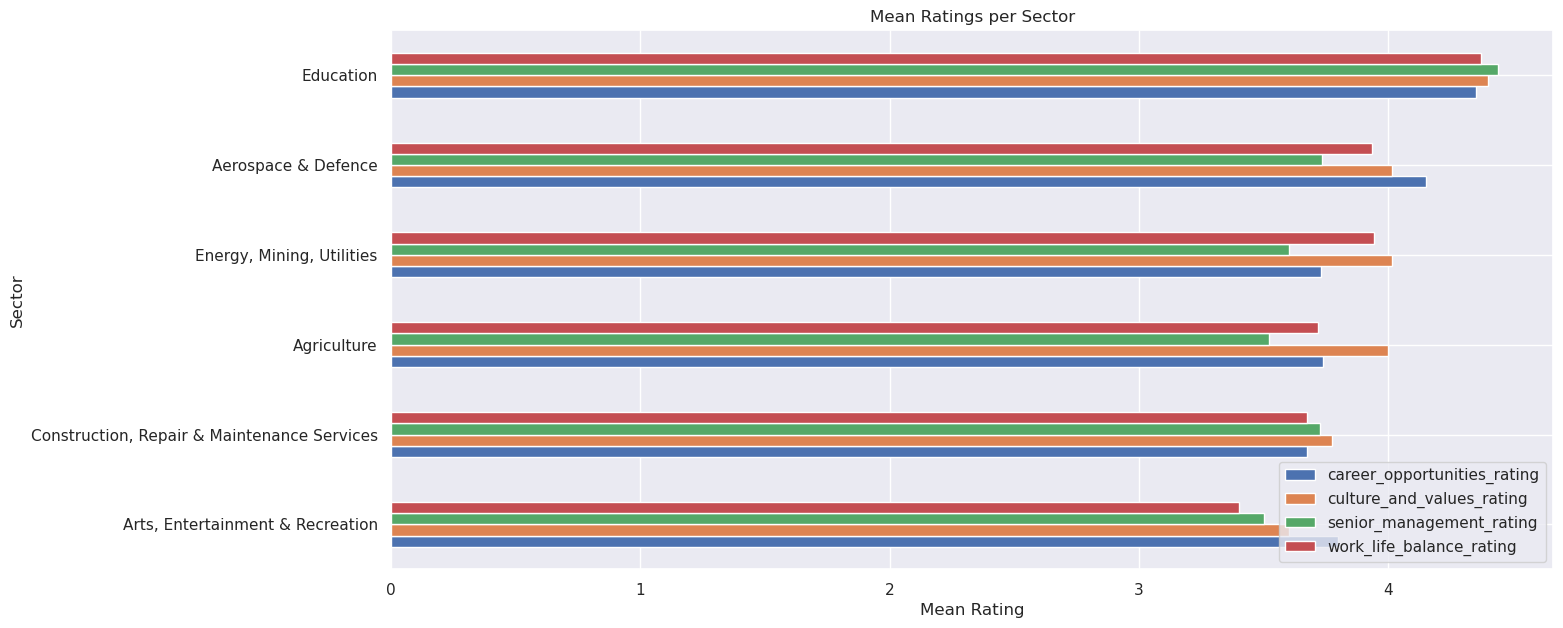

In [54]:
mean_ratings = df[df['sector'] != '--'].groupby('sector')[['career_opportunities_rating', 'culture_and_values_rating', 'senior_management_rating', 'work_life_balance_rating']].mean().head(6)

mean_ratings['overall_mean_rating'] = mean_ratings.mean(axis=1)

mean_ratings = mean_ratings.sort_values('overall_mean_rating')

mean_ratings[['career_opportunities_rating', 'culture_and_values_rating', 'senior_management_rating', 'work_life_balance_rating']].plot(kind='barh', figsize=(15,7))
plt.title('Mean Ratings per Sector')
plt.ylabel('Sector', fontsize=12)
plt.xlabel('Mean Rating', fontsize=12)
plt.legend(loc='lower right')
plt.show()

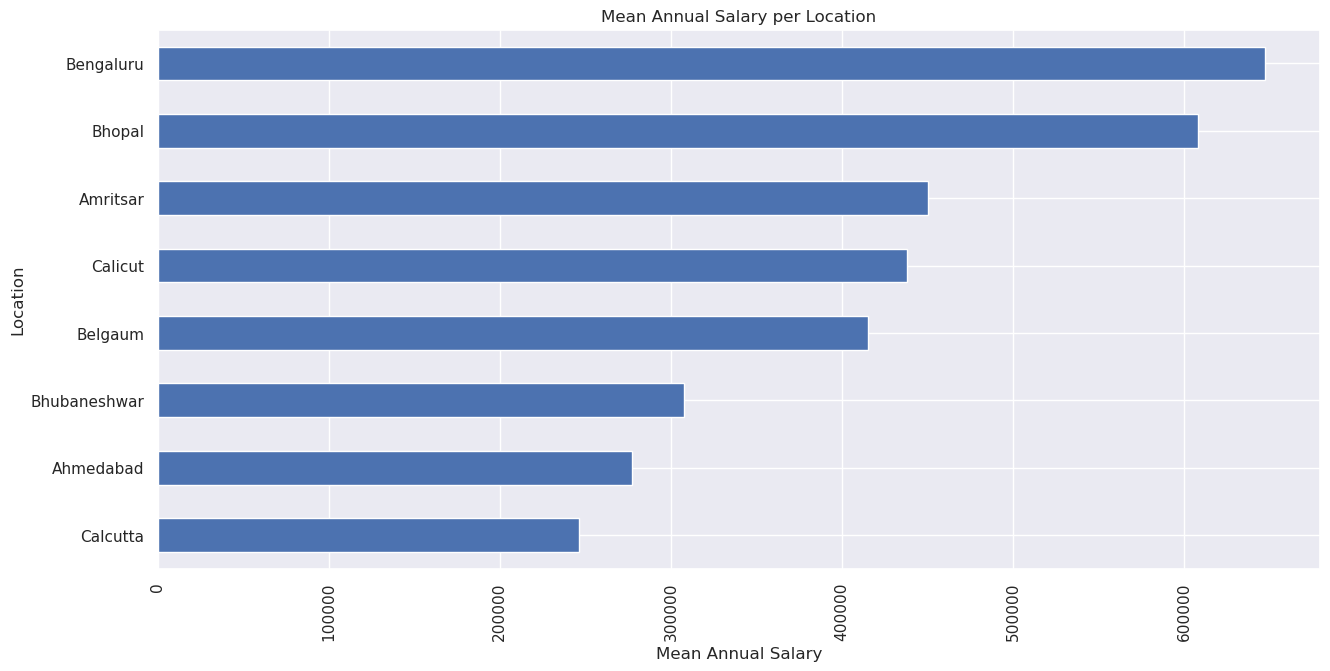

In [55]:
mean_salary = df.groupby('location')['annual_salary_estimate'].mean().head(8)

mean_salary.sort_values().plot(kind='barh', figsize=(15,7))
plt.title('Mean Annual Salary per Location')
plt.ylabel('Location', fontsize=12)
plt.xlabel('Mean Annual Salary', fontsize=12)
plt.xticks(rotation=90)
plt.show()

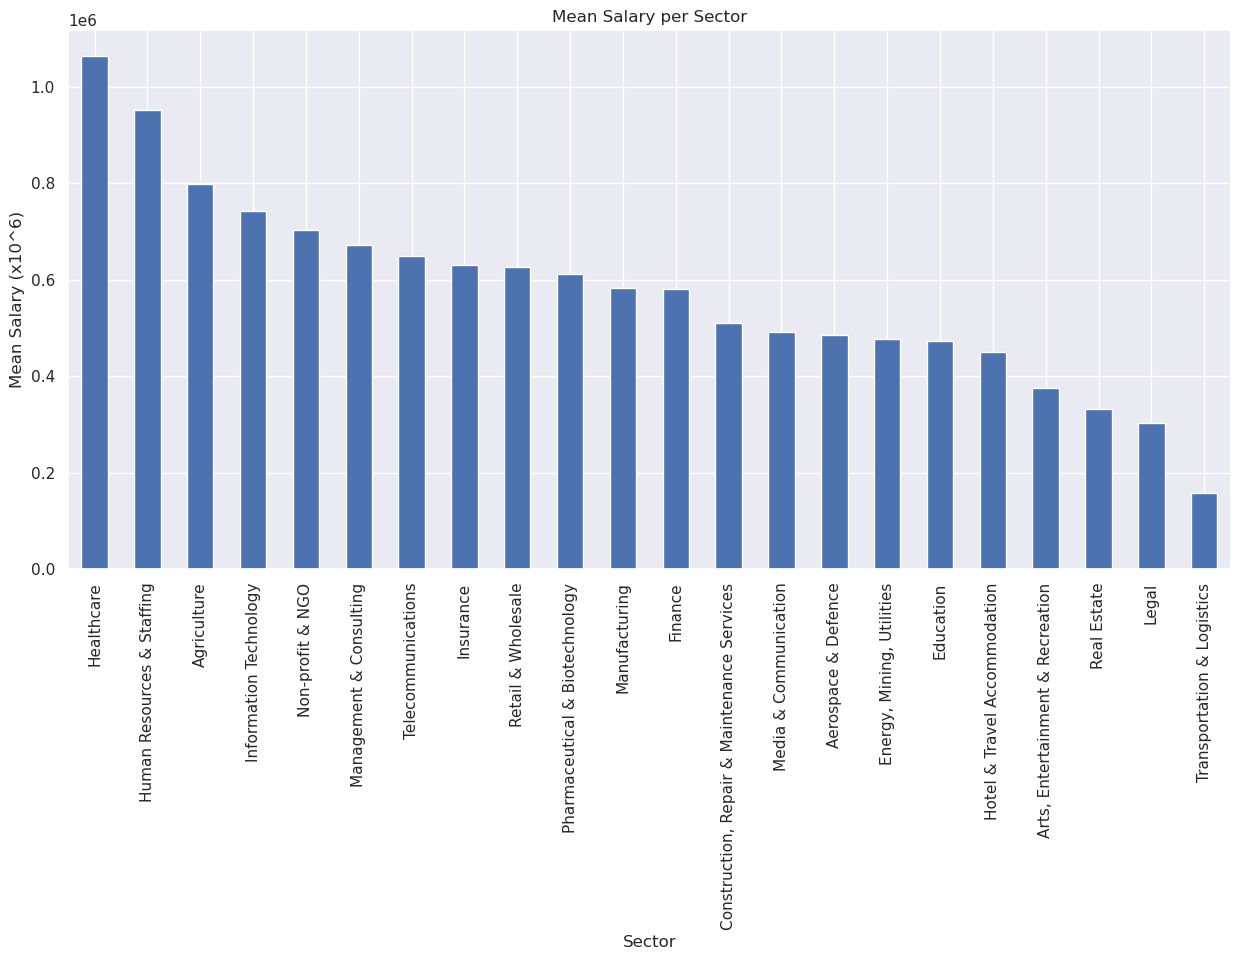

In [56]:
mean_salary = df[df['sector']!='--'].groupby('sector')['annual_salary_estimate'].mean()

mean_salary.sort_values(ascending=False).plot(kind='bar', figsize=(15,7))
plt.title('Mean Salary per Sector')
plt.ylabel('Mean Salary (x10^6)', fontsize=12)
plt.xlabel('Sector', fontsize=12)
plt.xticks(rotation=90)
plt.show()

#Step 6: Results and Inferences

**Guidelines**: List out your inferences here


- Almost half of the jobs are related to I.T. Sector, followed by finance and consulting sector.
- Most jobs are based in bangaluru, followed by remote jobs and jobs based in hyderabad.
- Top 3 most posted jobs are of Data Analyst, Data Scientist and Data Engineer.
- Salary of jobs vary based on the location with jobs in bangaluru having highest annual salary mean.
